In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
def load_and_preprocess_data(filepath):
    # Read the dataset
    data = pd.read_csv(filepath)

    # Select important columns
    selected_columns = ['Price range', 'Aggregate rating', 'Votes',
                        'Has Table booking', 'Has Online delivery', 'Rating text']
    data = data[selected_columns]

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Encode categorical columns
    label_encoders = {}
    categorical_columns = ['Has Table booking', 'Has Online delivery', 'Rating text']
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    return data, label_encoders

# Train the model
def train_model(data):
    # Define features and target
    X = data[['Price range', 'Aggregate rating', 'Votes', 'Has Table booking', 'Has Online delivery']]
    y = data['Rating text']

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Train a Random Forest model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return model, accuracy, conf_matrix

# Predict with user input
def predict_user_input(model, label_encoders):
    print("Enter feature values for prediction:")
    price_range = int(input("Price range (e.g., 1-4): "))
    aggregate_rating = float(input("Aggregate rating (e.g., 4.5): "))
    votes = int(input("Number of votes (e.g., 150): "))
    has_table_booking = input("Has table booking (Yes/No): ")
    has_online_delivery = input("Has online delivery (Yes/No): ")

    # Encode categorical inputs
    has_table_booking = label_encoders['Has Table booking'].transform([has_table_booking])[0]
    has_online_delivery = label_encoders['Has Online delivery'].transform([has_online_delivery])[0]

    # Prepare input for prediction
    input_data = [[price_range, aggregate_rating, votes, has_table_booking, has_online_delivery]]
    prediction = model.predict(input_data)

    # Decode the prediction
    rating_text = label_encoders['Rating text'].inverse_transform(prediction)[0]
    print(f"Predicted Rating: {rating_text}")

# Main function
def main():
    filepath = "Dataset.csv"  # Replace with the correct path to your dataset

    # Load and preprocess the data
    data, label_encoders = load_and_preprocess_data(filepath)

    # Train the model
    model, accuracy, conf_matrix = train_model(data)

    # Output performance metrics
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)

    # User prediction
    predict_user_input(model, label_encoders)

if __name__ == "__main__":
    main()


Model Accuracy: 100.00%
Confusion Matrix:
[[1121    0    0    0    0    0]
 [   0   90    0    0    0    0]
 [   0    0  630    0    0    0]
 [   0    0    0  645    0    0]
 [   0    0    0    0   56    0]
 [   0    0    0    0    0  324]]
Enter feature values for prediction:
Price range (e.g., 1-4): 2
Aggregate rating (e.g., 4.5): 3.5
Number of votes (e.g., 150): 211
Has table booking (Yes/No): Yes
Has online delivery (Yes/No): No
Predicted Rating: Good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Model Accuracy: 100.00%
Confusion Matrix:
[[1121    0    0    0    0    0]
 [   0   90    0    0    0    0]
 [   0    0  630    0    0    0]
 [   0    0    0  645    0    0]
 [   0    0    0    0   56    0]
 [   0    0    0    0    0  324]]


<ipython-input-2-0676b689d593>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


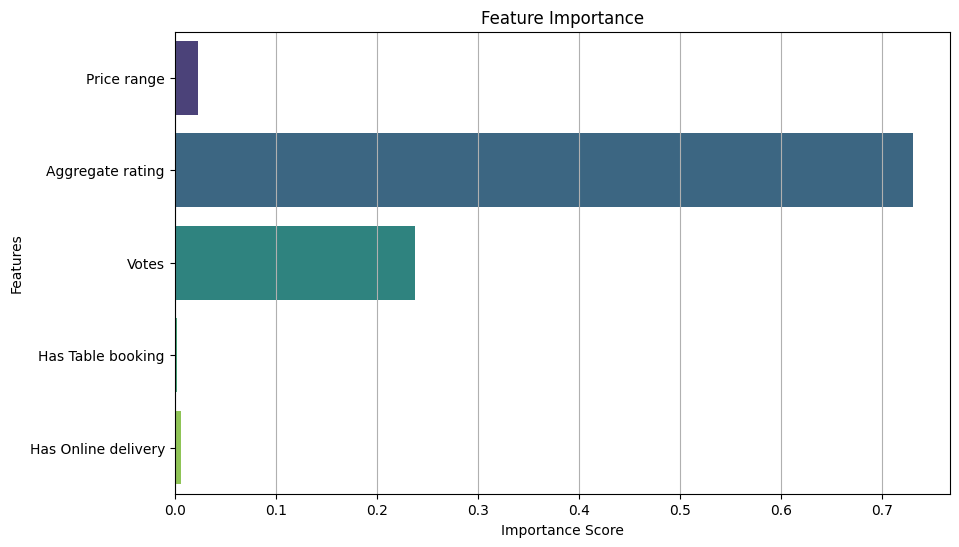

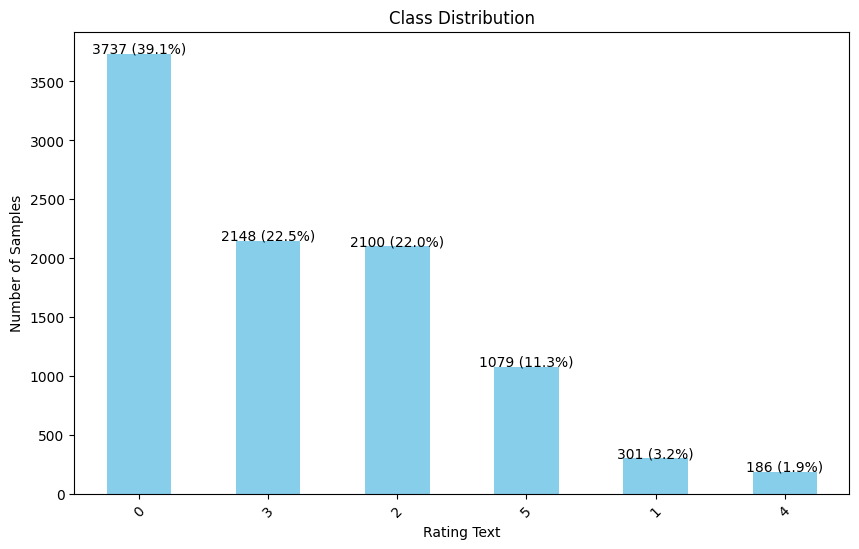

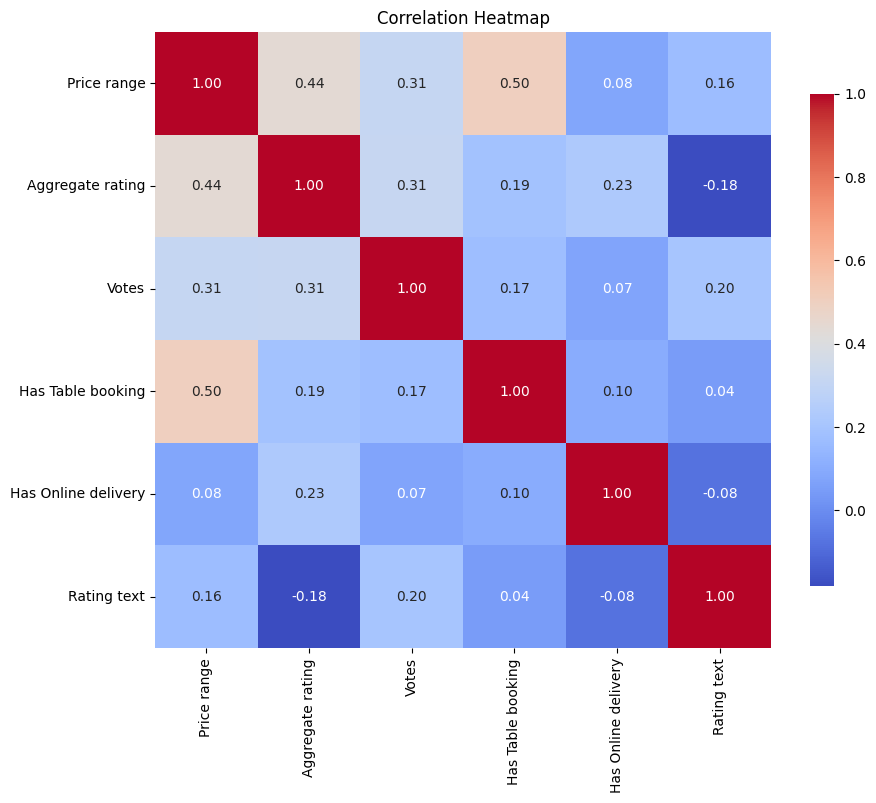

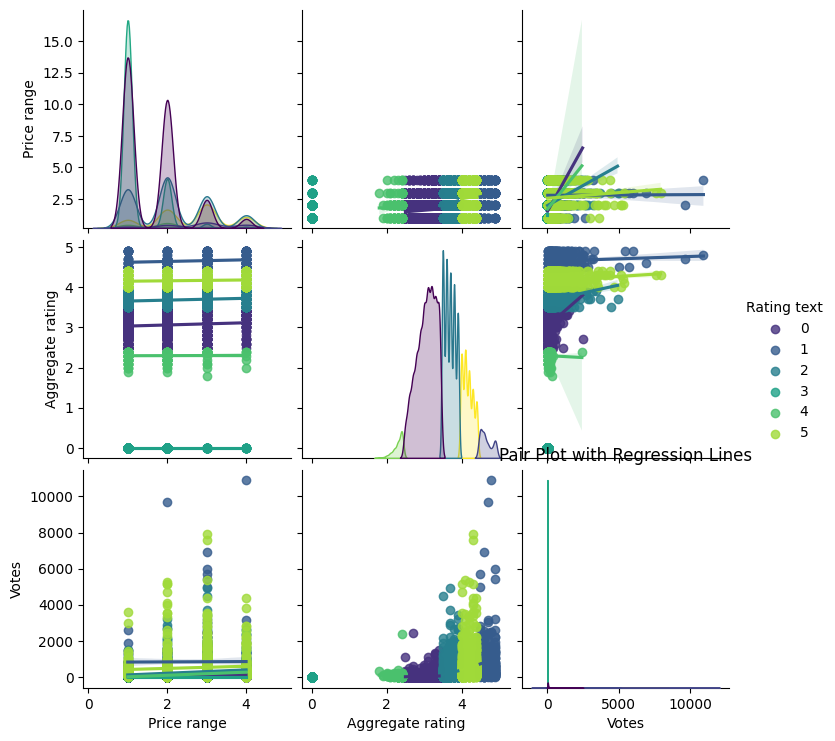

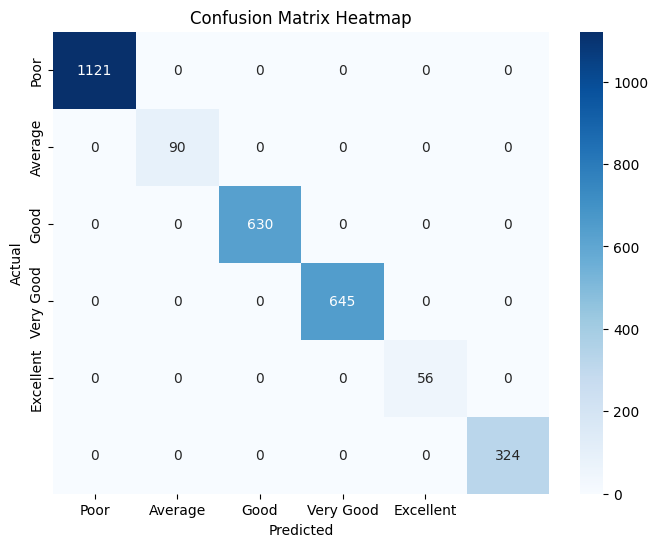

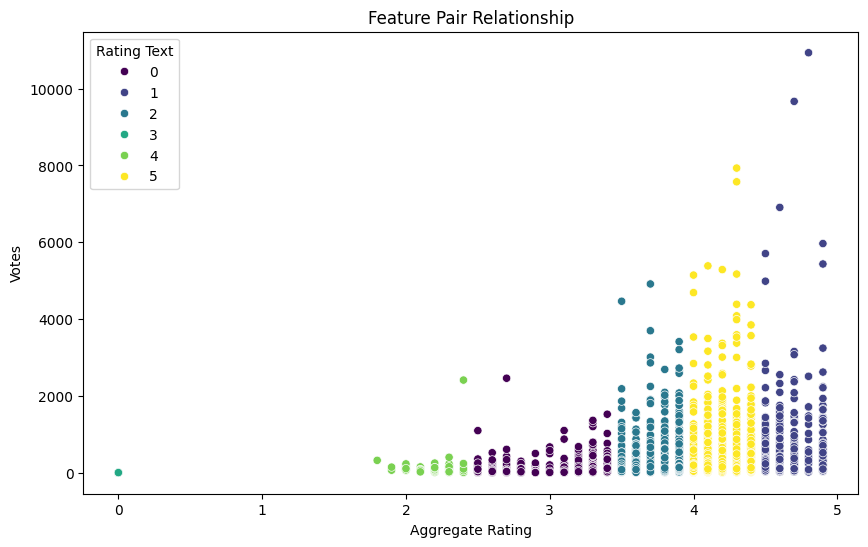

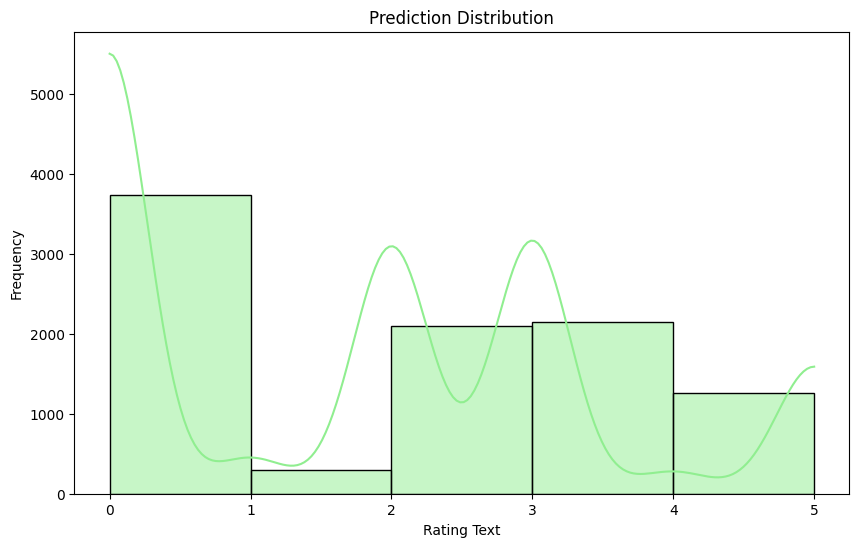

Price range (1-4): 2
Aggregate rating (e.g., 4.5): 3.5
Number of votes (e.g., 150): 3211
Has table booking (Yes/No): Yes
Has online delivery (Yes/No): Yes
Predicted Rating: Good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [2]:
def load_and_preprocess_data(filepath):
    """Load and preprocess the dataset."""
    try:
        data = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: The file {filepath} was not found.")
        return None, None

    selected_columns = ['Price range', 'Aggregate rating', 'Votes',
                        'Has Table booking', 'Has Online delivery', 'Rating text']
    data = data[selected_columns]

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Encode categorical columns
    label_encoders = {}
    categorical_columns = ['Has Table booking', 'Has Online delivery', 'Rating text']
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

    return data, label_encoders

def train_model(data, test_size=0.3, random_state=42):
    """Train the Random Forest model."""
    X = data[['Price range', 'Aggregate rating', 'Votes', 'Has Table booking', 'Has Online delivery']]
    y = data['Rating text']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    model = RandomForestClassifier(random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return model, accuracy, conf_matrix

def create_visualizations(data, model, conf_matrix):
    """Create various visualizations."""
    # 1. Feature Importance
    plt.figure(figsize=(10, 6))
    feature_importance = model.feature_importances_
    features = ['Price range', 'Aggregate rating', 'Votes', 'Has Table booking', 'Has Online delivery']
    sns.barplot(x=feature_importance, y=features, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.grid(axis='x')
    plt.show()

    # 2. Class Distribution
    plt.figure(figsize=(10, 6))
    class_counts = data['Rating text'].value_counts()
    class_counts.plot(kind='bar', color='skyblue')
    for i, count in enumerate(class_counts):
        plt.text(i, count + 5, f'{count} ({count / class_counts.sum() * 100:.1f}%)', ha='center')
    plt.title('Class Distribution')
    plt.xlabel('Rating Text')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap')
    plt.show()

    # 4. Pair Plot with Regression Lines
    sns.pairplot(data[['Price range', 'Aggregate rating', 'Votes', 'Rating text']], hue='Rating text', palette='viridis', kind='reg')
    plt.title('Pair Plot with Regression Lines')
    plt.show()

    # 5. Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'], yticklabels=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Aggregate rating', y='Votes', hue='Rating text', palette='viridis')
    plt.title('Feature Pair Relationship')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Votes')
    plt.legend(title='Rating Text')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(data['Rating text'], bins=5, kde=True, color='lightgreen')
    plt.title('Prediction Distribution')
    plt.xlabel('Rating Text')
    plt.ylabel('Frequency')
    plt.show()

def get_user_input(label_encoders):
    """Get user input for prediction."""
    while True:
        try:
            price_range = int(input("Price range (1-4): "))
            aggregate_rating = float(input("Aggregate rating (e.g., 4.5): "))
            votes = int(input("Number of votes (e.g., 150): "))
            has_table_booking = input("Has table booking (Yes/No): ").strip().capitalize()
            has_online_delivery = input("Has online delivery (Yes/No): ").strip().capitalize()

            if has_table_booking not in ['Yes', 'No'] or has_online_delivery not in ['Yes', 'No']:
                raise ValueError("Please enter 'Yes' or 'No' for table booking and online delivery.")

            break
        except ValueError as e:
            print(f"Invalid input: {e}. Please try again.")

    # Encode categorical inputs
    has_table_booking = label_encoders['Has Table booking'].transform([has_table_booking])[0]
    has_online_delivery = label_encoders['Has Online delivery'].transform([has_online_delivery])[0]

    return [[price_range, aggregate_rating, votes, has_table_booking, has_online_delivery]]

def predict_user_input(model, label_encoders):
    """Predict rating based on user input."""
    input_data = get_user_input(label_encoders)
    prediction = model.predict(input_data)
    rating_text = label_encoders['Rating text'].inverse_transform(prediction)[0]
    print(f"Predicted Rating: {rating_text}")

def main():
    filepath = "Dataset.csv"  # Replace with the correct path to your dataset

    data, label_encoders = load_and_preprocess_data(filepath)
    if data is None:
        return

    model, accuracy, conf_matrix = train_model(data)

    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)

    create_visualizations(data, model, conf_matrix)
    predict_user_input(model, label_encoders)

if __name__ == "__main__":
    main()